In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
train_df = pd.read_csv('/Users/alecclarkfeather/Downloads/fraud/train.csv')
train_df.head(15)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.00,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98,0
1,1,0.00,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00,0
2,2,0.00,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69,0
3,3,0.00,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00,0
4,4,0.00,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00,0
5,5,0.00,1.052469,0.099592,1.077244,1.370024,-0.471625,0.238658,-0.281837,0.055925,...,-0.013418,0.210670,-0.031069,0.131544,0.452867,-0.376528,0.086428,0.049083,35.97,0
6,6,0.00,1.206129,0.420150,-0.358910,1.037382,0.735224,-0.082449,0.568558,-0.158037,...,-0.366513,-1.113867,0.042265,-0.819477,0.473615,-0.639652,0.006812,0.016747,36.00,0
7,7,0.00,-1.074970,-0.297535,-0.884465,0.065341,-0.239956,0.349602,1.756880,0.054202,...,0.624183,0.908389,-0.233799,-0.457045,0.551736,-0.064708,0.137524,0.203869,440.00,0
8,8,0.00,2.154065,-0.000479,-2.125939,-0.121096,0.918473,-0.208507,0.226055,-0.236828,...,0.243716,0.780992,-0.148060,-0.280708,0.507044,-0.420133,-0.037652,-0.079346,1.00,0
9,9,0.00,2.172667,-0.704020,-1.447412,-0.715805,-0.530117,-1.007526,-0.436662,-0.176599,...,0.502916,1.442638,-0.063396,0.017817,0.270144,0.240989,-0.057164,-0.081458,10.00,0


In [3]:
test_df = pd.read_csv('/Users/alecclarkfeather/Downloads/fraud/test.csv')
test_df.head(15)

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98
5,219134,120581.0,-2.917054,0.332300,0.738487,-2.611142,0.715475,1.295536,-0.019965,0.695776,...,-0.505513,-0.056434,-0.165928,-0.532125,-0.918683,0.342380,0.553516,-0.782526,-0.089565,4.58
6,219135,120581.0,1.943914,-0.246766,-1.749592,0.351744,0.297945,-1.278818,0.619363,-0.468734,...,0.003989,0.004468,-0.122938,0.116724,-0.303537,-0.133514,0.367747,-0.116512,-0.071780,89.99
7,219136,120581.0,2.055286,-0.270588,-3.426773,-1.096434,2.955984,2.847826,-0.019754,0.636386,...,-0.125848,0.139898,0.325926,0.049353,0.714928,0.374717,-0.357979,-0.024047,-0.069653,23.99
8,219137,120581.0,1.786816,-1.101709,1.304714,0.839487,-2.028244,0.369870,-1.444412,0.339908,...,-0.104789,0.078881,0.848405,0.174950,0.543044,-0.439453,0.771877,0.023049,-0.019980,45.90
9,219138,120581.0,-1.448837,0.143569,-0.038152,-0.356529,0.007908,-0.397589,0.434479,0.313925,...,-0.305798,0.283636,0.816684,-0.111469,-0.766785,-0.404916,-0.205916,-0.184056,-0.056775,99.96


In [4]:
sample_df = pd.read_csv('/Users/alecclarkfeather/Downloads/fraud/sample_submission.csv')
sample_df.head(15)

,id,Class
0,219129,0.5
1,219130,0.5
2,219131,0.5
3,219132,0.5
4,219133,0.5
5,219134,0.5
6,219135,0.5
7,219136,0.5
8,219137,0.5
9,219138,0.5


In [5]:
train_df.shape

(219129, 32)

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219129 entries, 0 to 219128
Data columns (total 32 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      219129 non-null  int64  
 1   Time    219129 non-null  float64
 2   V1      219129 non-null  float64
 3   V2      219129 non-null  float64
 4   V3      219129 non-null  float64
 5   V4      219129 non-null  float64
 6   V5      219129 non-null  float64
 7   V6      219129 non-null  float64
 8   V7      219129 non-null  float64
 9   V8      219129 non-null  float64
 10  V9      219129 non-null  float64
 11  V10     219129 non-null  float64
 12  V11     219129 non-null  float64
 13  V12     219129 non-null  float64
 14  V13     219129 non-null  float64
 15  V14     219129 non-null  float64
 16  V15     219129 non-null  float64
 17  V16     219129 non-null  float64
 18  V17     219129 non-null  float64
 19  V18     219129 non-null  float64
 20  V19     219129 non-null  float64
 21  V20     21

In [7]:
train_df['id'].nunique()

219129

In [9]:
train_df['Time'].nunique()

36845

In [11]:
train_df['Class'].value_counts()

0    218660
1       469
Name: Class, dtype: int64

Class
0    0.098545
1   -1.086640
Name: V1, dtype: float64


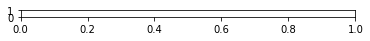

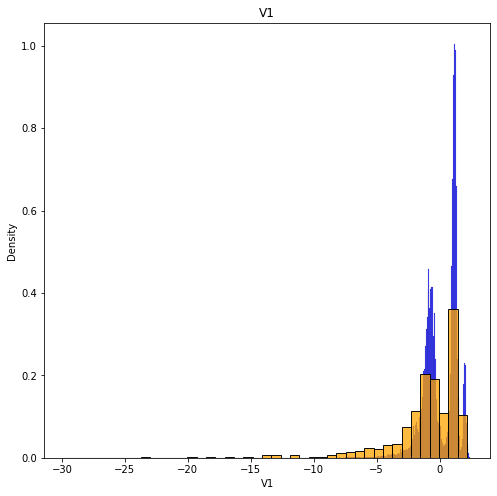

Class
0    0.047676
1    0.360162
Name: V2, dtype: float64


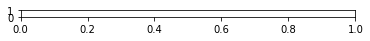

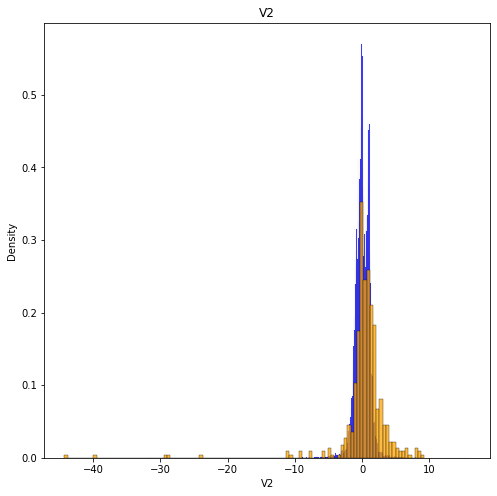

Class
0    0.594936
1   -0.729018
Name: V3, dtype: float64


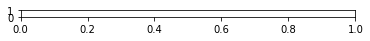

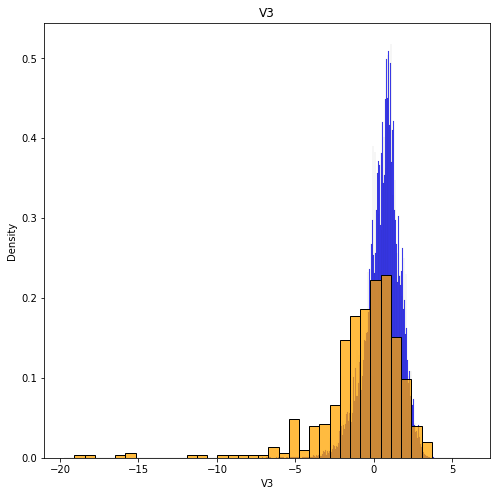

Class
0    0.067650
1    0.826276
Name: V4, dtype: float64


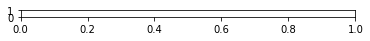

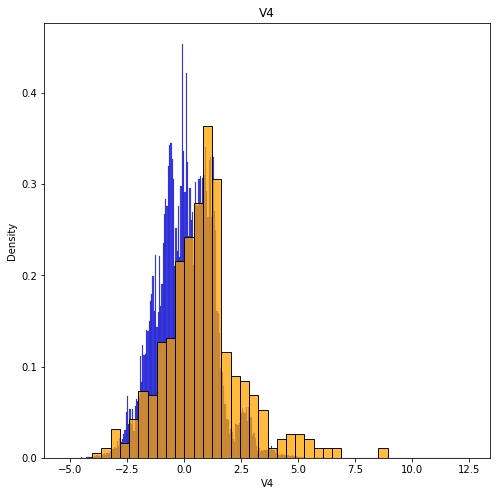

Class
0   -0.162057
1    0.072711
Name: V5, dtype: float64


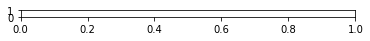

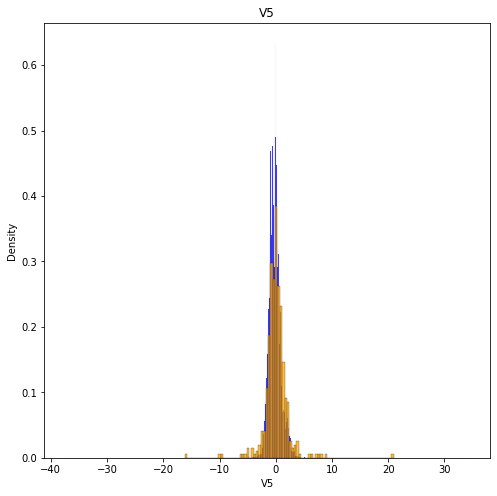

Class
0    0.133923
1    0.024195
Name: V6, dtype: float64


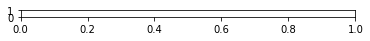

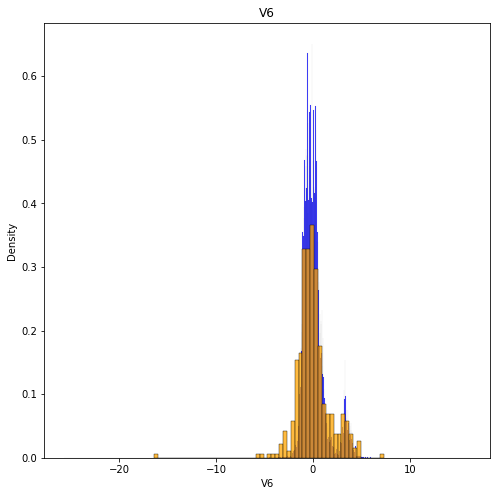

Class
0   -0.127294
1   -0.562112
Name: V7, dtype: float64


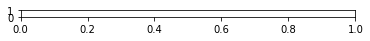

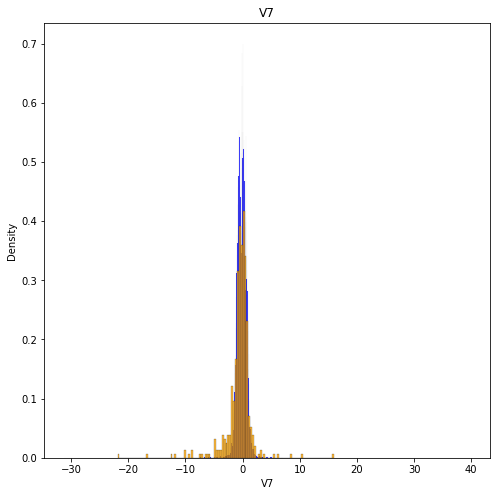

Class
0    0.150787
1   -0.434633
Name: V8, dtype: float64


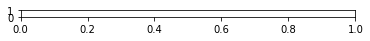

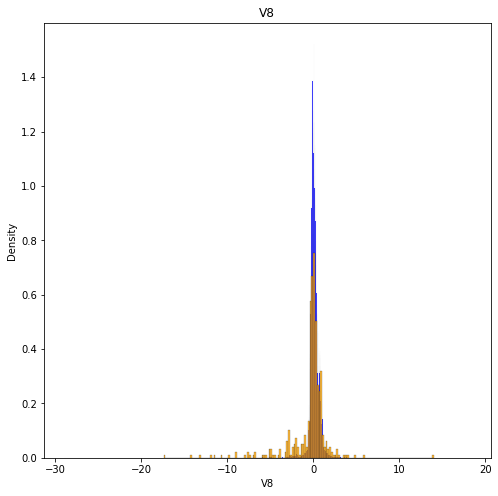

Class
0   -0.049075
1    0.295541
Name: V9, dtype: float64


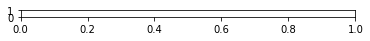

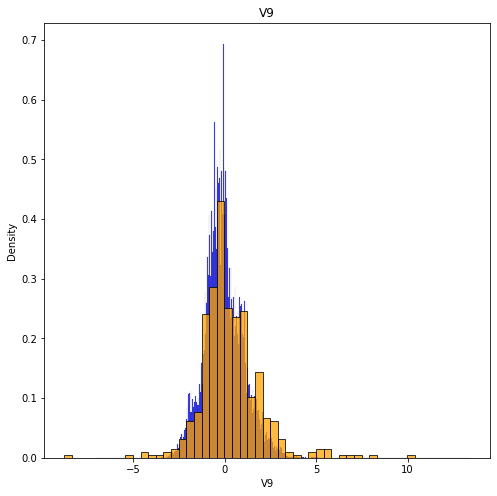

Class
0   -0.039134
1   -0.330673
Name: V10, dtype: float64


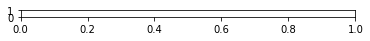

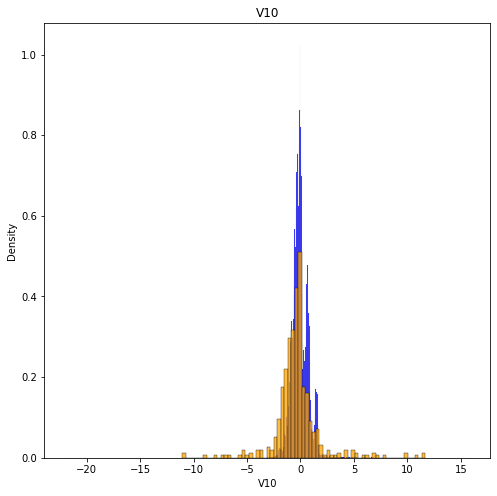

Class
0    0.152886
1    0.501366
Name: V11, dtype: float64


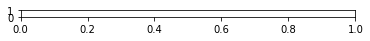

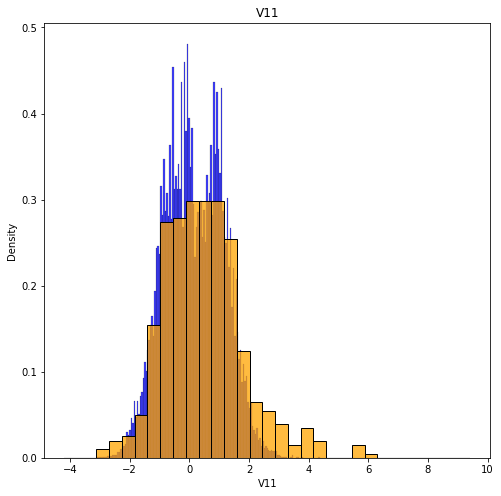

Class
0   -0.060095
1   -0.500703
Name: V12, dtype: float64


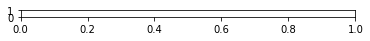

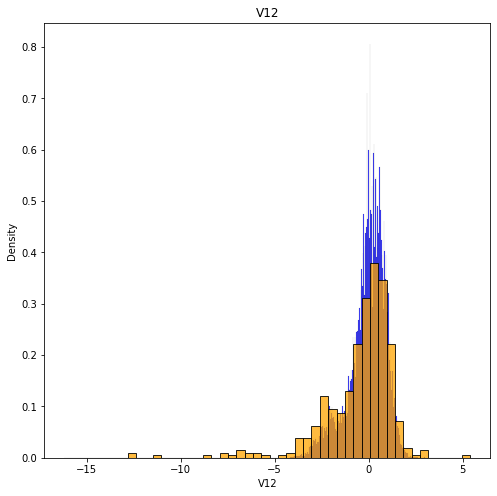

Class
0    0.014136
1    0.104337
Name: V13, dtype: float64


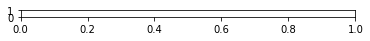

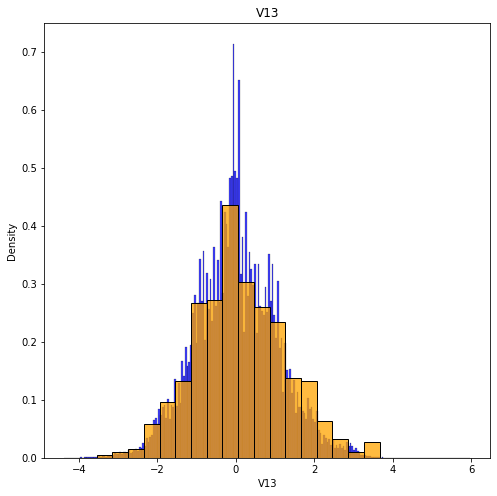

Class
0    0.069074
1   -0.596737
Name: V14, dtype: float64


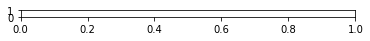

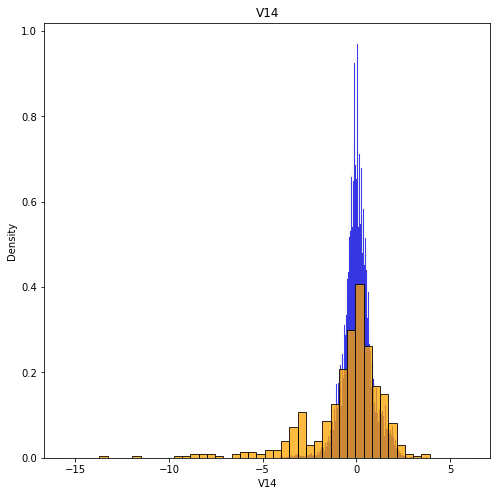

Class
0    0.108414
1    0.215408
Name: V15, dtype: float64


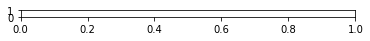

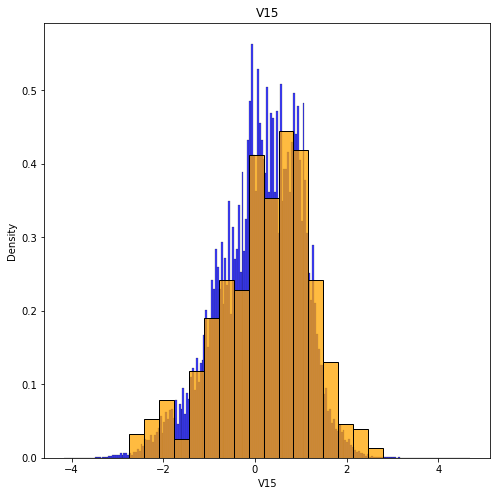

Class
0    0.013845
1   -0.077345
Name: V16, dtype: float64


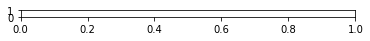

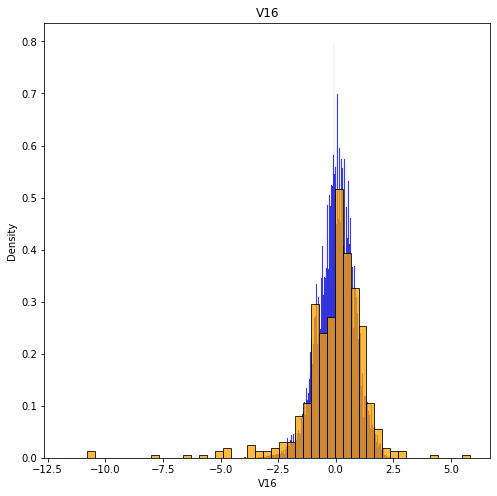

Class
0    0.036398
1    0.231121
Name: V17, dtype: float64


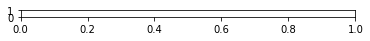

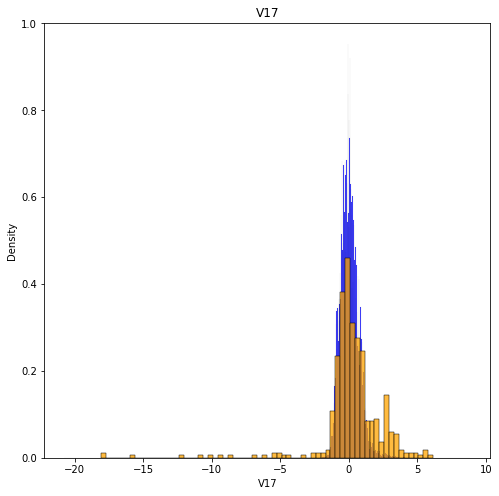

Class
0   -0.034692
1    0.322761
Name: V18, dtype: float64


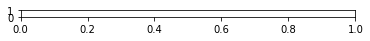

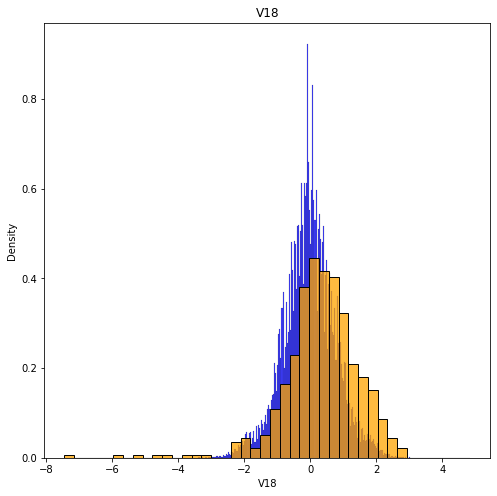

Class
0   -0.007979
1   -0.158610
Name: V19, dtype: float64


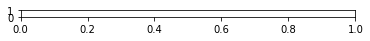

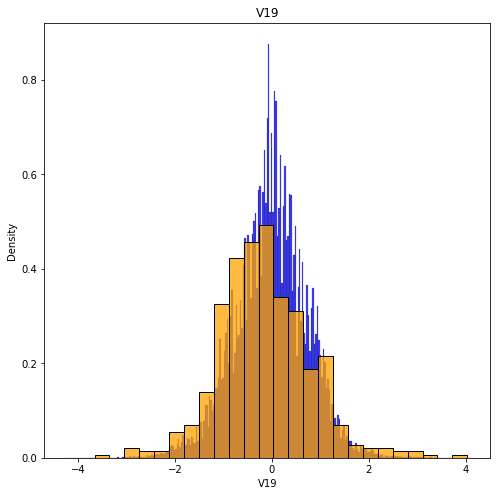

Class
0    0.009338
1    0.181932
Name: V20, dtype: float64


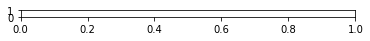

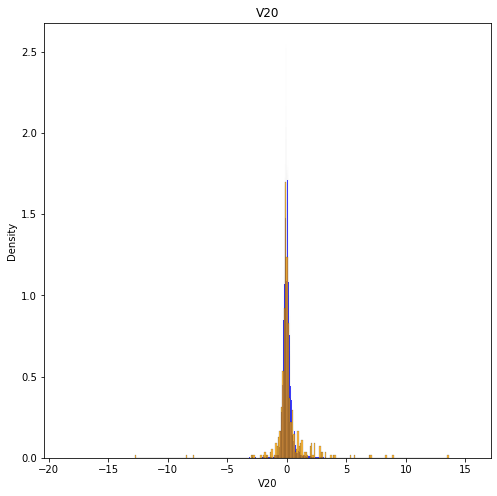

Class
0   -0.031200
1    0.032385
Name: V21, dtype: float64


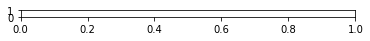

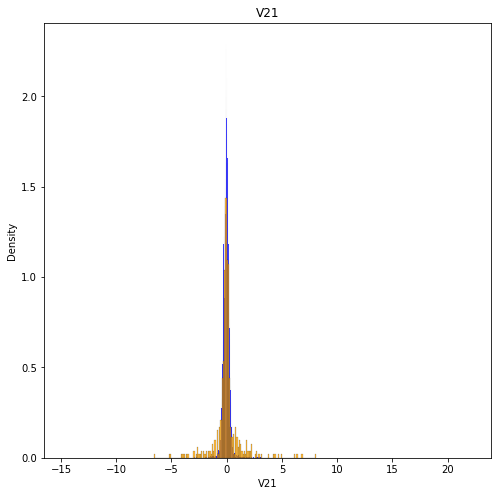

Class
0   -0.050896
1   -0.030467
Name: V22, dtype: float64


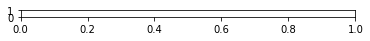

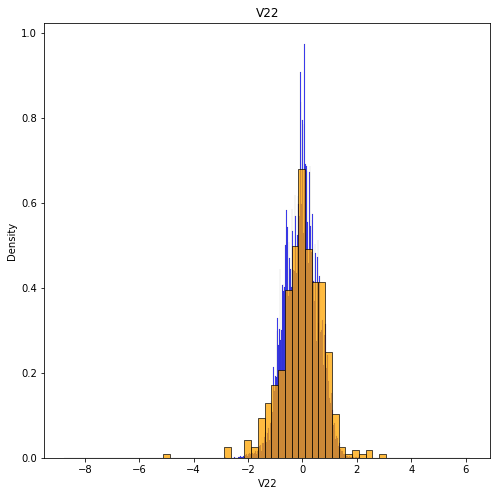

Class
0   -0.050369
1   -0.125792
Name: V23, dtype: float64


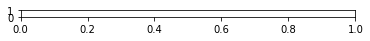

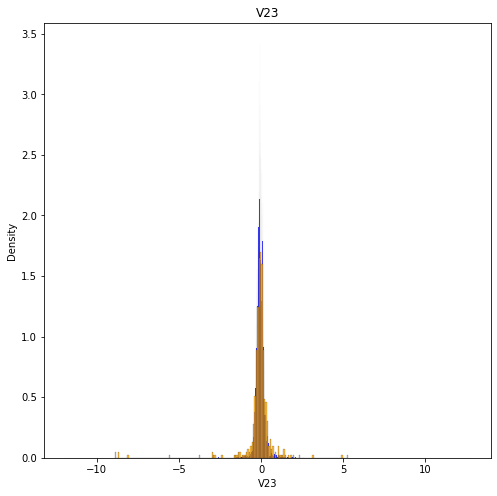

Class
0   -0.002846
1   -0.071228
Name: V24, dtype: float64


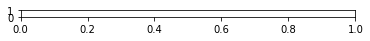

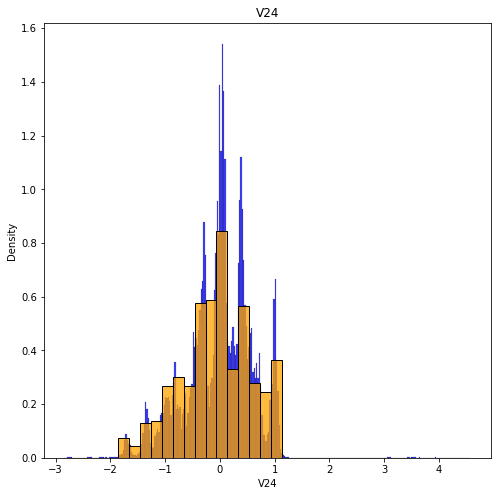

Class
0    0.124017
1    0.118310
Name: V25, dtype: float64


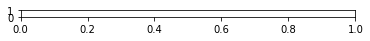

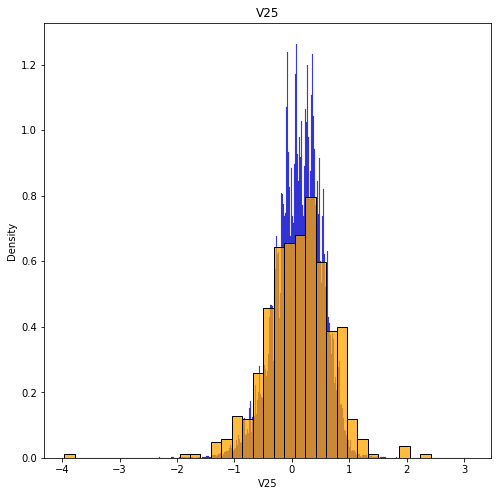

Class
0    0.010218
1   -0.147291
Name: V26, dtype: float64


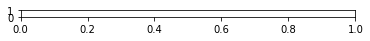

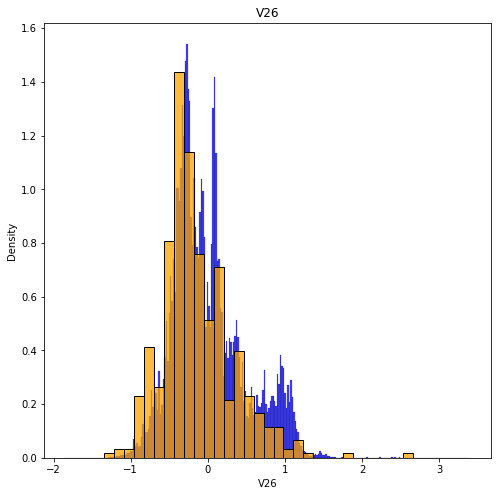

Class
0    0.014067
1   -0.001152
Name: V27, dtype: float64


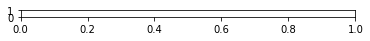

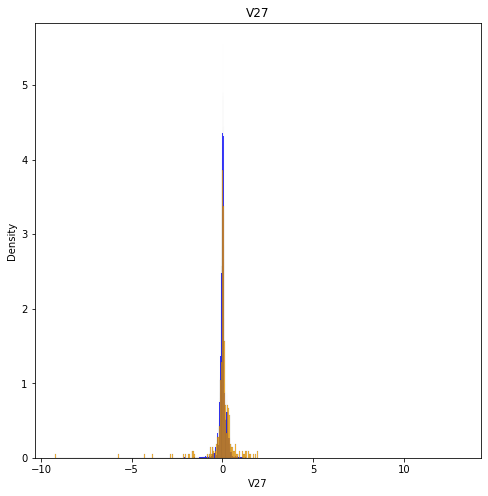

Class
0    0.017167
1    0.085422
Name: V28, dtype: float64


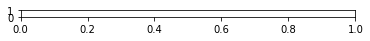

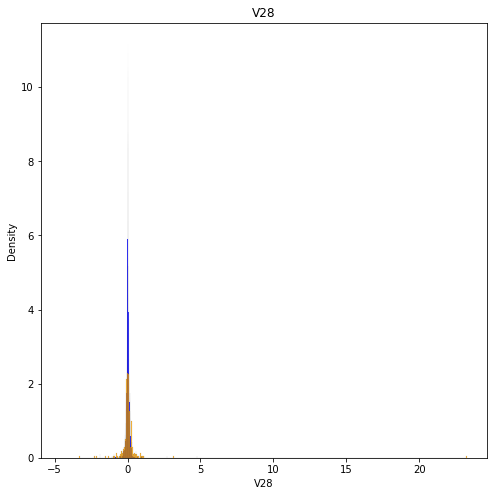

In [27]:
feature_cols = [col for col in train_df.columns if col.startswith('V')]

for i, col in enumerate(feature_cols):
    
    temp_df = train_df.groupby('Class')[col].mean()
    print(temp_df)
    
    plt.subplot(len(feature_cols), 1, i + 1)
    
    plt.figure(figsize=(8,8))
    
    sns.histplot(x=col, color='blue', data=train_df[train_df['Class']==0], stat='density')
    sns.histplot(x=col, color='orange', data=train_df[train_df['Class']==1], stat='density')
    
    plt.title(col)
    
    plt.show()
   

In [28]:
from scipy import stats

In [31]:
for col in train_df.columns:
    
    if col != 'Class':
        
        print(f"{col} vs. Class = {stats.pointbiserialr(train_df[col], train_df['Class'])}")

id vs. Class = PointbiserialrResult(correlation=0.008551160379177095, pvalue=6.255685208690654e-05)
Time vs. Class = PointbiserialrResult(correlation=0.006888965790771358, pvalue=0.0012604812516083537)
V1 vs. Class = PointbiserialrResult(correlation=-0.039251078559659716, pvalue=1.868932054430743e-75)
V2 vs. Class = PointbiserialrResult(correlation=0.012451377196485832, pvalue=5.581604716825361e-09)
V3 vs. Class = PointbiserialrResult(correlation=-0.054008190046508836, pvalue=3.177134209143628e-141)
V4 vs. Class = PointbiserialrResult(correlation=0.02797727117631194, pvalue=3.3366773375122705e-39)
V5 vs. Class = PointbiserialrResult(correlation=0.010144229470085055, pvalue=2.0469566327869917e-06)
V6 vs. Class = PointbiserialrResult(correlation=-0.0042173051274556886, pvalue=0.04836248936890963)
V7 vs. Class = PointbiserialrResult(correlation=-0.024589415923741635, pvalue=1.1441345275976929e-30)
V8 vs. Class = PointbiserialrResult(correlation=-0.037774401163154586, pvalue=5.109097080825

In [32]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

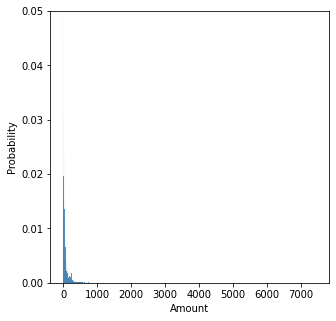

In [40]:
plt.figure(figsize=(5,5))
sns.histplot(x='Amount', data=train_df, stat='probability')
plt.ylim(0, 0.05)
plt.show()

In [41]:
train_df['Amount'].describe()

count    219129.000000
mean         66.359803
std         150.795017
min           0.000000
25%           5.990000
50%          21.900000
75%          68.930000
max        7475.000000
Name: Amount, dtype: float64

In [42]:
train_df['Time'].describe()

count    219129.000000
mean      62377.415376
std       25620.348569
min           0.000000
25%       47933.000000
50%       63189.000000
75%       77519.000000
max      120580.000000
Name: Time, dtype: float64

In [43]:
X = train_df.drop('Class', axis=1)
y = train_df['Class']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

In [45]:
X_train.shape

(164346, 31)

In [46]:
X_test.shape

(54783, 31)

In [47]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [48]:
X_train.columns

Index(['id', 'Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',
       'Amount'],
      dtype='object')

In [49]:
X_train_mod = X_train.drop('id', axis=1)
X_test_mod = X_test.drop('id', axis=1)

In [56]:
sum(y_train==0)

163994

In [57]:
xgb_classifier = XGBClassifier(scale_pos_weight=(sum(y_train==0)/sum(y_train==1)), objective='binary:logistic')
lgbm_classifier = LGBMClassifier(scale_pos_weight=(sum(y_train==0)/sum(y_train==1)))

In [58]:
xgb_classifier.fit(X_train_mod, y_train)
lgbm_classifier.fit(X_train_mod, y_train)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[12:51:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LGBMClassifier(scale_pos_weight=465.89204545454544)

In [59]:
from sklearn import metrics

In [68]:
xgb_preds = xgb_classifier.predict_proba(X_test_mod)
lgbm_preds = lgbm_classifier.predict_proba(X_test_mod)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [69]:
xgb_preds

array([[9.9943322e-01, 5.6675146e-04],
       [9.9846405e-01, 1.5359774e-03],
       [9.9953377e-01, 4.6622902e-04],
       ...,
       [9.9659920e-01, 3.4007905e-03],
       [9.9981624e-01, 1.8375408e-04],
       [9.9978524e-01, 2.1476012e-04]], dtype=float32)

In [70]:
lgbm_preds

array([[9.99999951e-01, 4.89302378e-08],
       [0.00000000e+00, 1.00000000e+00],
       [1.00000000e+00, 0.00000000e+00],
       ...,
       [1.00000000e+00, 0.00000000e+00],
       [9.99999951e-01, 4.89302378e-08],
       [0.00000000e+00, 1.00000000e+00]])

In [71]:
roc_xgb = metrics.roc_auc_score(y_test, xgb_preds[:, 1])
roc_lgbm = metrics.roc_auc_score(y_test, lgbm_preds[:, 1])

In [72]:
print(roc_xgb)

0.6185749294628671


In [73]:
print(roc_lgbm)

0.6182822429666903


In [74]:
from imblearn.over_sampling import SMOTE

In [75]:
sm = SMOTE()

X_train_mod_sm, y_train_sm = sm.fit_resample(X_train_mod, y_train)

In [76]:
X_train_mod_sm.shape

(327988, 30)

In [77]:
X_train_mod.shape

(164346, 30)

In [78]:
y_train.shape

(164346,)

In [79]:
y_train_sm.shape

(327988,)

In [80]:
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

In [81]:
xgb_model.fit(X_train_mod_sm, y_train_sm)
lgbm_model.fit(X_train_mod_sm, y_train_sm)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:01:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


LGBMClassifier()

In [82]:
xgb_preds = xgb_model.predict_proba(X_test_mod)
lgbm_preds = lgbm_model.predict_proba(X_test_mod)

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [83]:
roc_xgb = metrics.roc_auc_score(y_test, xgb_preds[:, 1])
roc_lgbm = metrics.roc_auc_score(y_test, lgbm_preds[:, 1])

In [84]:
print(roc_xgb)

0.6416361863074629


In [85]:
print(roc_lgbm)

0.7315514479382331


In [86]:
scaler = preprocessing.MinMaxScaler()

X_train_mod.loc[:, ['Time', 'Amount']] = scaler.fit_transform(X_train_mod.loc[:, ['Time', 'Amount']])
X_test_mod.loc[:, ['Time', 'Amount']] = scaler.transform(X_test_mod.loc[:, ['Time', 'Amount']])

In [87]:
sm = SMOTE()

X_train_mod_sm, y_train_sm = sm.fit_resample(X_train_mod, y_train)

In [88]:
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

xgb_model.fit(X_train_mod_sm, y_train_sm)
lgbm_model.fit(X_train_mod_sm, y_train_sm)

xgb_preds = xgb_model.predict_proba(X_test_mod)
lgbm_preds = lgbm_model.predict_proba(X_test_mod)

roc_xgb = metrics.roc_auc_score(y_test, xgb_preds[:, 1])
roc_lgbm = metrics.roc_auc_score(y_test, lgbm_preds[:, 1])

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:11:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [89]:
print(roc_xgb)

0.6280744199194424


In [90]:
print(roc_lgbm)

0.7259220797251749


In [91]:
from imblearn.over_sampling import ADASYN

ada = ADASYN()

X_train_mod_ada, y_train_ada = ada.fit_resample(X_train_mod, y_train)

In [92]:
X_train_mod_ada.shape

(327997, 30)

In [93]:
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

xgb_model.fit(X_train_mod_ada, y_train_ada)
lgbm_model.fit(X_train_mod_ada, y_train_ada)

xgb_preds = xgb_model.predict_proba(X_test_mod)
lgbm_preds = lgbm_model.predict_proba(X_test_mod)

roc_xgb = metrics.roc_auc_score(y_test, xgb_preds[:, 1])
roc_lgbm = metrics.roc_auc_score(y_test, lgbm_preds[:, 1])

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:18:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [94]:
print(roc_xgb)

0.6131230962478904


In [95]:
print(roc_lgbm)

0.717696995054036


In [96]:
X_train_mod.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
137510,0.591499,1.292717,0.307971,-0.391789,0.767598,0.280381,-0.396978,0.272626,-0.174980,-0.135785,...,-0.101097,0.097969,0.321519,-0.275859,-0.442716,0.895803,-0.160567,-0.020663,-0.009039,0.001852
158854,0.631149,-0.492425,0.390873,1.837884,-1.033662,-0.012457,-0.611865,0.716274,-0.122405,-0.292915,...,0.022125,-0.064277,-0.081864,-0.140976,0.380127,-0.376467,0.818270,-0.204825,-0.171815,0.002936
118704,0.545455,1.277544,0.453861,-0.002966,2.086338,0.535869,0.191180,0.150198,0.007539,-0.711891,...,-0.032259,-0.271834,-0.814002,-0.066278,-1.007827,0.481425,-0.174365,-0.018761,-0.002455,0.001010
78969,0.453525,1.206048,0.299840,0.201854,1.291628,-0.268923,-0.291655,-0.239402,0.005103,0.945331,...,-0.045787,-0.222034,-0.344521,-0.123525,-0.129978,0.623082,-0.386060,0.066236,0.062726,0.001647
164639,0.643166,0.382788,-2.187051,-0.453612,-0.207910,-1.251810,-0.465909,0.302088,-0.349846,-1.156489,...,0.564282,-0.184944,-1.203899,-0.436906,0.040068,0.129760,0.974142,-0.144416,0.094839,0.073707


In [97]:
X_train_nt = X_train_mod.drop('Time', axis=1)
X_test_nt = X_test_mod.drop('Time', axis=1)

In [98]:
ada = ADASYN()

X_train_nt_ada, y_train_ada = ada.fit_resample(X_train_nt, y_train)

In [99]:
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

xgb_model.fit(X_train_nt_ada, y_train_ada)
lgbm_model.fit(X_train_nt_ada, y_train_ada)

xgb_preds = xgb_model.predict_proba(X_test_nt)
lgbm_preds = lgbm_model.predict_proba(X_test_nt)

roc_xgb = metrics.roc_auc_score(y_test, xgb_preds[:, 1])
roc_lgbm = metrics.roc_auc_score(y_test, lgbm_preds[:, 1])

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:25:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [100]:
print(roc_xgb)

0.6204386951560698


In [101]:
print(roc_lgbm)

0.7258539112890995


In [102]:
from imblearn.over_sampling import BorderlineSMOTE

bd = BorderlineSMOTE()

X_train_nt_bd, y_train_bd = bd.fit_resample(X_train_nt, y_train)

In [103]:
X_train_nt_bd.shape

(327988, 29)

In [104]:
xgb_model = XGBClassifier()
lgbm_model = LGBMClassifier()

xgb_model.fit(X_train_nt_bd, y_train_bd)
lgbm_model.fit(X_train_nt_bd, y_train_bd)

xgb_preds = xgb_model.predict_proba(X_test_nt)
lgbm_preds = lgbm_model.predict_proba(X_test_nt)

roc_xgb = metrics.roc_auc_score(y_test, xgb_preds[:, 1])
roc_lgbm = metrics.roc_auc_score(y_test, lgbm_preds[:, 1])

/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:31:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/Users/alecclarkfeather/opt/anaconda3/lib/python3.8/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [105]:
print(roc_xgb)

0.7009358463095703


In [106]:
print(roc_lgbm)

0.7308014387917801


In [107]:
import optuna

In [108]:
X_train_nt.shape

(164346, 29)

In [114]:
import lightgbm as lgb

def objective(trial):
    
    dtrain = lgb.Dataset(X_train_nt, label=y_train)
    
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 3, 300)
    }
    
    gbm = lgb.train(param, dtrain)
    
    preds = gbm.predict(X_test_nt)
    
    roc = metrics.roc_auc_score(y_test, preds)
    
    return roc


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)

trial = study.best_trial

print(trial.value)

for key, value in trial.params.items():
    
    print(key, value)
    

[I 2023-01-26 13:48:23,178] A new study created in memory with name: no-name-6f496ed7-f9e6-465c-8413-839c48d3b5c2
[I 2023-01-26 13:48:24,397] Trial 0 finished with value: 0.7442374219072716 and parameters: {'lambda_l1': 0.15047448992026136, 'lambda_l2': 2.7774324739592214e-06, 'num_leaves': 2, 'feature_fraction': 0.43255462023452307, 'bagging_fraction': 0.9586968805978515, 'bagging_freq': 3, 'min_child_samples': 95, 'scale_pos_weight': 120.17365830338908}. Best is trial 0 with value: 0.7442374219072716.
[I 2023-01-26 13:48:27,881] Trial 1 finished with value: 0.643623702728082 and parameters: {'lambda_l1': 3.0030066603220448e-06, 'lambda_l2': 3.108878131422515e-08, 'num_leaves': 96, 'feature_fraction': 0.7164077787058922, 'bagging_fraction': 0.7356820091826108, 'bagging_freq': 3, 'min_child_samples': 23, 'scale_pos_weight': 223.3619479080562}. Best is trial 0 with value: 0.7442374219072716.
[I 2023-01-26 13:48:30,590] Trial 2 finished with value: 0.5992621548542961 and parameters: {'la

0.8124825474732181
lambda_l1 8.531977176820831
lambda_l2 7.45623341283001
num_leaves 5
feature_fraction 0.4154764479945798
bagging_fraction 0.9502815751586314
bagging_freq 1
min_child_samples 98
scale_pos_weight 8.890374588361283


In [115]:
def objective(trial):
    
    dtrain = lgb.Dataset(X_train_nt_bd, label=y_train_bd)
    
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 100.0)
    }
    
    gbm = lgb.train(param, dtrain)
    
    preds = gbm.predict(X_test_nt)
    
    roc = metrics.roc_auc_score(y_test, preds)
    
    return roc


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)

trial = study.best_trial

print(trial.value)

for key, value in trial.params.items():
    
    print(key, value)
    

[I 2023-01-26 13:53:46,684] A new study created in memory with name: no-name-3e0b2128-c598-4eca-ae80-7a46d6762eed
[I 2023-01-26 13:53:53,095] Trial 0 finished with value: 0.695953921889604 and parameters: {'lambda_l1': 3.4740228988324656e-07, 'lambda_l2': 0.431470364047309, 'num_leaves': 77, 'feature_fraction': 0.8255740226004507, 'bagging_fraction': 0.8745307069491692, 'bagging_freq': 3, 'min_child_samples': 85, 'scale_pos_weight': 71.08512739779587}. Best is trial 0 with value: 0.695953921889604.
[I 2023-01-26 13:53:58,471] Trial 1 finished with value: 0.7273085881910379 and parameters: {'lambda_l1': 4.221936498045092e-05, 'lambda_l2': 0.0004980358431689394, 'num_leaves': 151, 'feature_fraction': 0.6880845209942146, 'bagging_fraction': 0.4137781147857879, 'bagging_freq': 3, 'min_child_samples': 90, 'scale_pos_weight': 76.90747671031622}. Best is trial 1 with value: 0.7273085881910379.
[I 2023-01-26 13:54:03,511] Trial 2 finished with value: 0.7517044454263201 and parameters: {'lambda

0.8138163661157845
lambda_l1 0.3419030571717187
lambda_l2 6.784162382375588e-07
num_leaves 8
feature_fraction 0.41595228238062765
bagging_fraction 0.5614747495369959
bagging_freq 7
min_child_samples 44
scale_pos_weight 23.911342783154886


In [119]:
from imblearn.over_sampling import BorderlineSMOTE

bd = BorderlineSMOTE(sampling_strategy=0.5)

X_train_nt_bd, y_train_bd = bd.fit_resample(X_train_nt, y_train)

In [120]:
X_train_nt_bd.shape

(245991, 29)

In [121]:
X_train_nt.shape

(164346, 29)

In [122]:
def objective(trial):
    
    dtrain = lgb.Dataset(X_train_nt_bd, label=y_train_bd)
    
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 100.0)
    }
    
    gbm = lgb.train(param, dtrain)
    
    preds = gbm.predict(X_test_nt)
    
    roc = metrics.roc_auc_score(y_test, preds)
    
    return roc


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)

trial = study.best_trial

print(trial.value)

for key, value in trial.params.items():
    
    print(key, value)
    

[I 2023-01-26 14:03:59,703] A new study created in memory with name: no-name-837d16d8-cd1a-4b8d-8f23-ec3ae8aeb496
[I 2023-01-26 14:04:04,515] Trial 0 finished with value: 0.769511416805896 and parameters: {'lambda_l1': 4.82810475192216e-05, 'lambda_l2': 0.04076385347498553, 'num_leaves': 247, 'feature_fraction': 0.41092788711622596, 'bagging_fraction': 0.608598956148043, 'bagging_freq': 1, 'min_child_samples': 73, 'scale_pos_weight': 48.224065096025306}. Best is trial 0 with value: 0.769511416805896.
[I 2023-01-26 14:04:07,603] Trial 1 finished with value: 0.7644583533069979 and parameters: {'lambda_l1': 0.0007323759148357983, 'lambda_l2': 1.919054149794453e-07, 'num_leaves': 35, 'feature_fraction': 0.5728352866960065, 'bagging_fraction': 0.5415665188590489, 'bagging_freq': 5, 'min_child_samples': 85, 'scale_pos_weight': 21.461342663160153}. Best is trial 0 with value: 0.769511416805896.
[I 2023-01-26 14:04:11,609] Trial 2 finished with value: 0.7284394650216185 and parameters: {'lambd

0.8130142143697188
lambda_l1 2.7222031910281364e-08
lambda_l2 9.108918053953989
num_leaves 5
feature_fraction 0.7149494936400892
bagging_fraction 0.8289848340696527
bagging_freq 3
min_child_samples 40
scale_pos_weight 31.25835897779129


In [124]:
X_train_mod.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
137510,0.591499,1.292717,0.307971,-0.391789,0.767598,0.280381,-0.396978,0.272626,-0.174980,-0.135785,...,-0.101097,0.097969,0.321519,-0.275859,-0.442716,0.895803,-0.160567,-0.020663,-0.009039,0.001852
158854,0.631149,-0.492425,0.390873,1.837884,-1.033662,-0.012457,-0.611865,0.716274,-0.122405,-0.292915,...,0.022125,-0.064277,-0.081864,-0.140976,0.380127,-0.376467,0.818270,-0.204825,-0.171815,0.002936
118704,0.545455,1.277544,0.453861,-0.002966,2.086338,0.535869,0.191180,0.150198,0.007539,-0.711891,...,-0.032259,-0.271834,-0.814002,-0.066278,-1.007827,0.481425,-0.174365,-0.018761,-0.002455,0.001010
78969,0.453525,1.206048,0.299840,0.201854,1.291628,-0.268923,-0.291655,-0.239402,0.005103,0.945331,...,-0.045787,-0.222034,-0.344521,-0.123525,-0.129978,0.623082,-0.386060,0.066236,0.062726,0.001647
164639,0.643166,0.382788,-2.187051,-0.453612,-0.207910,-1.251810,-0.465909,0.302088,-0.349846,-1.156489,...,0.564282,-0.184944,-1.203899,-0.436906,0.040068,0.129760,0.974142,-0.144416,0.094839,0.073707


In [125]:
X_test_mod.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
55215,0.399992,-1.076488,-0.433186,2.255065,-1.356600,-0.562979,-0.410937,-0.120530,0.203864,-1.332924,...,0.342441,0.206635,0.267801,0.001571,0.370113,0.290989,-0.357551,0.041648,0.102829,0.009003
9531,0.084077,1.177056,-0.492371,0.619342,-1.285737,-0.827898,-0.521428,-0.551478,-0.068045,2.481706,...,0.035123,-0.182366,-0.334829,-0.007107,-0.078861,0.155861,-0.177866,-0.016151,0.008741,0.007692
32600,0.316885,1.152550,0.034387,-0.006965,1.294823,-0.065334,-0.151823,0.102025,-0.013628,0.534158,...,-0.155534,-0.039156,-0.043326,-0.243272,-0.417867,0.838357,-0.209210,0.011225,0.012537,0.006045
195738,0.746865,2.004089,0.165912,-1.559938,0.611510,0.622336,-0.534268,0.338534,-0.310735,1.606859,...,-0.079180,-0.508128,-1.048753,0.280041,0.251657,-0.274875,0.180972,-0.093516,-0.030391,0.006688
65338,0.426422,-1.087496,1.139969,0.397768,-0.599869,-0.585589,-0.374524,-0.091936,0.814056,-0.963466,...,-0.240789,0.257816,0.453699,-0.129237,0.112917,-0.273901,0.845258,-0.214315,-0.103825,0.005351


In [126]:
X_train_mod2 = X_train.drop('id', axis=1)
X_test_mod2 = X_test.drop('id', axis=1)

In [127]:
bd = BorderlineSMOTE(sampling_strategy=0.5)

X_train_bd, y_train_bd = bd.fit_resample(X_train_mod2, y_train)

In [128]:
def objective(trial):
    
    dtrain = lgb.Dataset(X_train_bd, label=y_train_bd)
    
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 100.0)
    }
    
    gbm = lgb.train(param, dtrain)
    
    preds = gbm.predict(X_test_mod2)
    
    roc = metrics.roc_auc_score(y_test, preds)
    
    return roc


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)

trial = study.best_trial

print(trial.value)

for key, value in trial.params.items():
    
    print(key, value)
    

[I 2023-01-26 14:11:31,056] A new study created in memory with name: no-name-5c89f68b-35c2-4210-b226-81e53329dcb4
[I 2023-01-26 14:11:34,305] Trial 0 finished with value: 0.7659625930397524 and parameters: {'lambda_l1': 9.026466179817729e-08, 'lambda_l2': 0.0004243190897438824, 'num_leaves': 19, 'feature_fraction': 0.9132501927997763, 'bagging_fraction': 0.838852490849737, 'bagging_freq': 1, 'min_child_samples': 57, 'scale_pos_weight': 87.8379392866721}. Best is trial 0 with value: 0.7659625930397524.
[I 2023-01-26 14:11:38,417] Trial 1 finished with value: 0.7336252693513147 and parameters: {'lambda_l1': 1.4704943126528516e-08, 'lambda_l2': 0.0012910581133220378, 'num_leaves': 121, 'feature_fraction': 0.4296095440431575, 'bagging_fraction': 0.45532119933998805, 'bagging_freq': 7, 'min_child_samples': 36, 'scale_pos_weight': 87.79596209170073}. Best is trial 0 with value: 0.7659625930397524.
[I 2023-01-26 14:11:43,134] Trial 2 finished with value: 0.7432282632589953 and parameters: {'l

0.7812804784048336
lambda_l1 9.978238667058474e-06
lambda_l2 0.003649289751002152
num_leaves 115
feature_fraction 0.5095860568083046
bagging_fraction 0.9655601955594483
bagging_freq 1
min_child_samples 100
scale_pos_weight 78.30878903242717


In [130]:
X_train_mod3 = X_train.drop(columns=['id', 'Time'], axis=1)
X_test_mod3 = X_test.drop(columns=['id', 'Time'], axis=1)

In [131]:
bd = BorderlineSMOTE(sampling_strategy=0.5)

X_train_bd, y_train_bd = bd.fit_resample(X_train_mod3, y_train)

In [132]:
def objective(trial):
    
    dtrain = lgb.Dataset(X_train_bd, label=y_train_bd)
    
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 100.0)
    }
    
    gbm = lgb.train(param, dtrain)
    
    preds = gbm.predict(X_test_mod3)
    
    roc = metrics.roc_auc_score(y_test, preds)
    
    return roc


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)

trial = study.best_trial

print(trial.value)

for key, value in trial.params.items():
    
    print(key, value)
    

[I 2023-01-26 14:19:06,751] A new study created in memory with name: no-name-51d011ba-6ef6-4188-bff6-f1992938c69f
[I 2023-01-26 14:19:20,830] Trial 0 finished with value: 0.7510485587535308 and parameters: {'lambda_l1': 0.00014467560918102266, 'lambda_l2': 1.1005034224140704e-07, 'num_leaves': 201, 'feature_fraction': 0.4008544494743951, 'bagging_fraction': 0.8778334894613042, 'bagging_freq': 6, 'min_child_samples': 15, 'scale_pos_weight': 12.484585041238642}. Best is trial 0 with value: 0.7510485587535308.
[I 2023-01-26 14:19:32,368] Trial 1 finished with value: 0.7354128146028047 and parameters: {'lambda_l1': 2.4616973323322994e-05, 'lambda_l2': 1.2275692420539635e-05, 'num_leaves': 87, 'feature_fraction': 0.729631942352127, 'bagging_fraction': 0.7319821031267919, 'bagging_freq': 7, 'min_child_samples': 51, 'scale_pos_weight': 6.898585316151752}. Best is trial 0 with value: 0.7510485587535308.
[I 2023-01-26 14:19:48,881] Trial 2 finished with value: 0.6904144547103608 and parameters:

0.7848565851803697
lambda_l1 0.00028583646990850044
lambda_l2 1.0280759007659057
num_leaves 5
feature_fraction 0.6606111623703197
bagging_fraction 0.4494662954895139
bagging_freq 5
min_child_samples 89
scale_pos_weight 88.4989425758284


In [133]:
bd = BorderlineSMOTE()

X_train_bd, y_train_bd = bd.fit_resample(X_train_mod3, y_train)

In [134]:
def objective(trial):
    
    dtrain = lgb.Dataset(X_train_bd, label=y_train_bd)
    
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 1.0, 100.0)
    }
    
    gbm = lgb.train(param, dtrain)
    
    preds = gbm.predict(X_test_mod3)
    
    roc = metrics.roc_auc_score(y_test, preds)
    
    return roc


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=50)

trial = study.best_trial

print(trial.value)

for key, value in trial.params.items():
    
    print(key, value)
    

[I 2023-01-26 14:26:40,880] A new study created in memory with name: no-name-5ea991ea-5d79-4af8-8bf3-75c196ae522c
[I 2023-01-26 14:26:47,005] Trial 0 finished with value: 0.7377813550571757 and parameters: {'lambda_l1': 0.20783307085261107, 'lambda_l2': 8.594148947420473e-05, 'num_leaves': 96, 'feature_fraction': 0.6120985481609522, 'bagging_fraction': 0.47861754196224476, 'bagging_freq': 3, 'min_child_samples': 68, 'scale_pos_weight': 96.94097932178043}. Best is trial 0 with value: 0.7377813550571757.
[I 2023-01-26 14:26:54,486] Trial 1 finished with value: 0.713371113656483 and parameters: {'lambda_l1': 2.0940799364058866e-05, 'lambda_l2': 3.489379552061656e-08, 'num_leaves': 140, 'feature_fraction': 0.8932194598004358, 'bagging_fraction': 0.564870828377831, 'bagging_freq': 1, 'min_child_samples': 59, 'scale_pos_weight': 47.66900803229144}. Best is trial 0 with value: 0.7377813550571757.
[I 2023-01-26 14:27:00,313] Trial 2 finished with value: 0.7497027011899144 and parameters: {'lam

0.7859393845015621
lambda_l1 1.3406623675693217e-06
lambda_l2 4.109383214027076
num_leaves 16
feature_fraction 0.7773869117379691
bagging_fraction 0.6824397251797074
bagging_freq 6
min_child_samples 66
scale_pos_weight 83.88380991599422


In [135]:
def objective(trial):
    
    dtrain = lgb.Dataset(X_train_mod3, label=y_train)
    
    param = {
        "objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
        "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 2, 256),
        "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
        "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
        "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "scale_pos_weight": trial.suggest_float("scale_pos_weight", 3.0, 300.0)
    }
    
    gbm = lgb.train(param, dtrain)
    
    preds = gbm.predict(X_test_mod3)
    
    roc = metrics.roc_auc_score(y_test, preds)
    
    return roc


study = optuna.create_study(direction='maximize')

study.optimize(objective, n_trials=100)

trial = study.best_trial

print(trial.value)

for key, value in trial.params.items():
    
    print(key, value)
    

[I 2023-01-26 14:32:28,885] A new study created in memory with name: no-name-2db772ab-b37b-45ed-b1d9-d64ddb61bbad
[I 2023-01-26 14:32:30,995] Trial 0 finished with value: 0.4922432606276312 and parameters: {'lambda_l1': 7.946547784416386e-08, 'lambda_l2': 4.2317085643184745e-05, 'num_leaves': 165, 'feature_fraction': 0.6541757218553119, 'bagging_fraction': 0.6771257962546683, 'bagging_freq': 3, 'min_child_samples': 21, 'scale_pos_weight': 44.426038594620096}. Best is trial 0 with value: 0.4922432606276312.
[I 2023-01-26 14:32:35,473] Trial 1 finished with value: 0.5868881765600018 and parameters: {'lambda_l1': 6.323907600207445e-06, 'lambda_l2': 0.8099270230935375, 'num_leaves': 159, 'feature_fraction': 0.941669159643929, 'bagging_fraction': 0.40314213784807584, 'bagging_freq': 2, 'min_child_samples': 91, 'scale_pos_weight': 230.53599420516588}. Best is trial 1 with value: 0.5868881765600018.
[I 2023-01-26 14:32:38,580] Trial 2 finished with value: 0.46754103630407007 and parameters: {

0.8123172859206225
lambda_l1 1.721889399445099e-06
lambda_l2 3.8746239738176635
num_leaves 3
feature_fraction 0.5041987215313893
bagging_fraction 0.5382074877294869
bagging_freq 1
min_child_samples 70
scale_pos_weight 15.971335339184144


In [136]:
from sklearn.ensemble import RandomForestClassifier

In [137]:
rf_model = RandomForestClassifier(class_weight='balanced')

rf_model.fit(X_train_mod3, y_train)

rf_preds = rf_model.predict_proba(X_test_mod3)

rf_roc = metrics.roc_auc_score(y_test, rf_preds[:, 1])

print(rf_roc)

0.6721144347914187


In [138]:
def objective(trial):
    
    n_estimators = trial.suggest_int('n_estimators', 100, 500)
    rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32, log=True)
    class_weight = trial.suggest_categorical('class_weight', ['balanced', 'balanced_subsample'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 2, 32, log=True)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 60, log=True)
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    rf_model = RandomForestClassifier(n_estimators=n_estimators, max_depth=rf_max_depth,
                                     class_weight=class_weight, max_leaf_nodes=max_leaf_nodes,
                                     min_samples_split=min_samples_split, max_features=max_features)
    
    rf_model.fit(X_train_mod3, y_train)
    
    preds = rf_model.predict_proba(X_test_mod3)
    
    rf_roc = metrics.roc_auc_score(y_test, preds[:, 1])
    
    return rf_roc

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)
print(study.best_trial)

[I 2023-01-26 15:42:59,609] A new study created in memory with name: no-name-1af957a2-7297-4551-a012-31151ff044b9
[I 2023-01-26 16:09:03,727] Trial 0 finished with value: 0.819423454507419 and parameters: {'n_estimators': 499, 'rf_max_depth': 16, 'class_weight': 'balanced_subsample', 'max_leaf_nodes': 12, 'min_samples_split': 54, 'max_features': None}. Best is trial 0 with value: 0.819423454507419.
[I 2023-01-26 16:17:36,226] Trial 1 finished with value: 0.8116311455955841 and parameters: {'n_estimators': 340, 'rf_max_depth': 3, 'class_weight': 'balanced_subsample', 'max_leaf_nodes': 24, 'min_samples_split': 37, 'max_features': None}. Best is trial 0 with value: 0.819423454507419.
[I 2023-01-26 16:18:09,557] Trial 2 finished with value: 0.8030769449658706 and parameters: {'n_estimators': 122, 'rf_max_depth': 21, 'class_weight': 'balanced', 'max_leaf_nodes': 3, 'min_samples_split': 12, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.819423454507419.
[I 2023-01-26 16:21:27,734] Tr

KeyboardInterrupt: 

In [139]:
#0.8123172859206225
#lambda_l1 1.721889399445099e-06
#lambda_l2 3.8746239738176635
#num_leaves 3
#feature_fraction 0.5041987215313893
#bagging_fraction 0.5382074877294869
#bagging_freq 1
#min_child_samples 70
#scale_pos_weight 15.971335339184144
#(X_train_mod3)

#0.8130142143697188
#lambda_l1 2.7222031910281364e-08
#lambda_l2 9.108918053953989
#num_leaves 5
#feature_fraction 0.7149494936400892
#bagging_fraction 0.8289848340696527
#bagging_freq 3
#min_child_samples 40
#scale_pos_weight 31.25835897779129
#(X_train_nt_bd 50% upsample)

#0.8138163661157845
#lambda_l1 0.3419030571717187
#lambda_l2 6.784162382375588e-07
#num_leaves 8
#feature_fraction 0.41595228238062765
#bagging_fraction 0.5614747495369959
#bagging_freq 7
#min_child_samples 44
#scale_pos_weight 23.911342783154886


In [143]:
X_train_mod3.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
137510,1.292717,0.307971,-0.391789,0.767598,0.280381,-0.396978,0.272626,-0.174980,-0.135785,0.159975,...,-0.101097,0.097969,0.321519,-0.275859,-0.442716,0.895803,-0.160567,-0.020663,-0.009039,13.84
158854,-0.492425,0.390873,1.837884,-1.033662,-0.012457,-0.611865,0.716274,-0.122405,-0.292915,-0.486461,...,0.022125,-0.064277,-0.081864,-0.140976,0.380127,-0.376467,0.818270,-0.204825,-0.171815,21.95
118704,1.277544,0.453861,-0.002966,2.086338,0.535869,0.191180,0.150198,0.007539,-0.711891,0.807031,...,-0.032259,-0.271834,-0.814002,-0.066278,-1.007827,0.481425,-0.174365,-0.018761,-0.002455,7.55
78969,1.206048,0.299840,0.201854,1.291628,-0.268923,-0.291655,-0.239402,0.005103,0.945331,-1.126589,...,-0.045787,-0.222034,-0.344521,-0.123525,-0.129978,0.623082,-0.386060,0.066236,0.062726,12.31
164639,0.382788,-2.187051,-0.453612,-0.207910,-1.251810,-0.465909,0.302088,-0.349846,-1.156489,0.483502,...,0.564282,-0.184944,-1.203899,-0.436906,0.040068,0.129760,0.974142,-0.144416,0.094839,550.96


In [142]:
X_train_nt_bd.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,1.292717,0.307971,-0.391789,0.767598,0.280381,-0.396978,0.272626,-0.174980,-0.135785,0.159975,...,-0.101097,0.097969,0.321519,-0.275859,-0.442716,0.895803,-0.160567,-0.020663,-0.009039,0.001852
1,-0.492425,0.390873,1.837884,-1.033662,-0.012457,-0.611865,0.716274,-0.122405,-0.292915,-0.486461,...,0.022125,-0.064277,-0.081864,-0.140976,0.380127,-0.376467,0.818270,-0.204825,-0.171815,0.002936
2,1.277544,0.453861,-0.002966,2.086338,0.535869,0.191180,0.150198,0.007539,-0.711891,0.807031,...,-0.032259,-0.271834,-0.814002,-0.066278,-1.007827,0.481425,-0.174365,-0.018761,-0.002455,0.001010
3,1.206048,0.299840,0.201854,1.291628,-0.268923,-0.291655,-0.239402,0.005103,0.945331,-1.126589,...,-0.045787,-0.222034,-0.344521,-0.123525,-0.129978,0.623082,-0.386060,0.066236,0.062726,0.001647
4,0.382788,-2.187051,-0.453612,-0.207910,-1.251810,-0.465909,0.302088,-0.349846,-1.156489,0.483502,...,0.564282,-0.184944,-1.203899,-0.436906,0.040068,0.129760,0.974142,-0.144416,0.094839,0.073707


In [144]:
X.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,0.0,2.074329,-0.129425,-1.137418,0.412846,-0.192638,-1.210144,0.110697,-0.263477,...,-0.292969,-0.334701,-0.887840,0.336701,-0.110835,-0.291459,0.207733,-0.076576,-0.059577,1.98
1,1,0.0,1.998827,-1.250891,-0.520969,-0.894539,-1.122528,-0.270866,-1.029289,0.050198,...,0.065717,0.054848,-0.038367,0.133518,-0.461928,-0.465491,-0.464655,-0.009413,-0.038238,84.00
2,2,0.0,0.091535,1.004517,-0.223445,-0.435249,0.667548,-0.988351,0.948146,-0.084789,...,-0.021375,-0.326725,-0.803736,0.154495,0.951233,-0.506919,0.085046,0.224458,0.087356,2.69
3,3,0.0,1.979649,-0.184949,-1.064206,0.120125,-0.215238,-0.648829,-0.087826,-0.035367,...,-0.340089,-0.095514,-0.079792,0.167701,-0.042939,0.000799,-0.096148,-0.057780,-0.073839,1.00
4,4,0.0,1.025898,-0.171827,1.203717,1.243900,-0.636572,1.099074,-0.938651,0.569239,...,-0.203628,0.099157,0.608908,0.027901,-0.262813,0.257834,-0.252829,0.108338,0.021051,1.00


In [145]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [146]:
X_mod = X.drop(columns=['id', 'Time'], axis=1)

In [147]:
bd = BorderlineSMOTE(sampling_strategy=0.5)

X_mod_bd, y_bd = bd.fit_resample(X_mod, y)

params = {"objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        'lambda_l1': 2.7222031910281364e-08,
        'lambda_l2': 9.108918053953989,
        'num_leaves': 5,
        'feature_fraction': 0.7149494936400892,
        'bagging_fraction': 0.8289848340696527,
        'bagging_freq': 3,
        'min_child_samples': 40,
        'scale_pos_weight': 31.25835897779129}


dtrain_resample = lgb.Dataset(X_mod_bd, label=y_bd)

gbm_resample = lgb.train(params, dtrain_resample)


In [148]:
params2 = {"objective": "binary",
        "metric": "binary_logloss",
        "verbosity": -1,
        "boosting_type": "gbdt",
        'lambda_l1': 1.721889399445099e-06,
        'lambda_l2': 3.8746239738176635,
        'num_leaves': 3,
        'feature_fraction': 0.5041987215313893,
        'bagging_fraction': 0.5382074877294869,
        'bagging_freq': 1,
        'min_child_samples': 70,
        'scale_pos_weight': 15.971335339184144}

dtrain_normal = lgb.Dataset(X_mod, label=y)

gbm_normal = lgb.train(params2, dtrain_normal)

In [150]:
rf_params = {'n_estimators': 184, 'max_depth': 24, 
          'class_weight': 'balanced_subsample', 
          'max_leaf_nodes': 17, 'min_samples_split': 14, 
          'max_features': 'log2'}

rf_model_final = RandomForestClassifier(**rf_params)

rf_model_final.fit(X_mod, y)

RandomForestClassifier(class_weight='balanced_subsample', max_depth=24,
                       max_features='log2', max_leaf_nodes=17,
                       min_samples_split=14, n_estimators=184)

In [151]:
test_df.head()

,id,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,219129,120580.0,2.115519,-0.691809,-1.305514,-0.685655,-0.641265,-0.764784,-0.924262,-0.023030,...,0.067367,0.241708,0.682524,0.037769,-0.546859,-0.123055,-0.084889,0.004720,-0.021944,29.95
1,219130,120580.0,1.743525,-1.681429,-0.547387,-1.061113,-0.695825,2.458824,-1.632859,1.073529,...,0.441788,0.543278,1.294571,0.309541,3.703925,-0.242579,0.068708,0.002629,0.064690,163.50
2,219131,120580.0,2.205568,-1.571445,-0.238965,-1.662517,-1.652324,-0.054701,-1.682064,0.105613,...,-0.366906,-0.131527,0.086623,0.291375,0.739087,-0.543006,-0.297813,0.043699,-0.037855,16.00
3,219132,120580.0,1.989728,-0.972909,-1.938259,-1.440129,-0.166855,-0.794048,0.252889,-0.399789,...,-0.049136,-0.080115,-0.010732,-0.038550,0.656830,0.343470,-0.627529,-0.024338,-0.036143,120.98
4,219133,120580.0,-1.943548,-1.668761,0.363601,-0.977610,2.684779,-2.037681,0.039709,-0.048895,...,0.391627,0.083389,-0.306918,0.247822,-0.391799,-0.790716,-0.025706,0.330758,0.335537,1.98


In [154]:
test_id_df = test_df[['id']]

test_df_final = test_df.drop(columns=['id', 'Time'], axis=1)

resample_preds = gbm_resample.predict(test_df_final)
normal_preds = gbm_normal.predict(test_df_final)
rf_preds = rf_model_final.predict_proba(test_df_final)

In [155]:
resample_preds

array([0.3776496 , 0.03486237, 0.00300946, ..., 0.78554086, 0.00144136,
       0.03715183])

In [156]:
normal_preds

array([0.0213873 , 0.01765876, 0.01240297, ..., 0.293318  , 0.00730803,
       0.0173374 ])

In [157]:
rf_preds

array([[0.48686546, 0.51313454],
       [0.6012757 , 0.3987243 ],
       [0.66505686, 0.33494314],
       ...,
       [0.5961677 , 0.4038323 ],
       [0.75233205, 0.24766795],
       [0.6553589 , 0.3446411 ]])

In [158]:
test_id_df['resample_preds'] = resample_preds
test_id_df['normal_preds'] = normal_preds
test_id_df['rf_preds'] = rf_preds[:, 1]

<ipython-input-158-2fdfb42644c0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id_df['resample_preds'] = resample_preds
<ipython-input-158-2fdfb42644c0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id_df['normal_preds'] = normal_preds
<ipython-input-158-2fdfb42644c0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [159]:
test_id_df

,id,resample_preds,normal_preds,rf_preds
0,219129,0.377650,0.021387,0.513135
1,219130,0.034862,0.017659,0.398724
2,219131,0.003009,0.012403,0.334943
3,219132,0.293952,0.046431,0.514318
4,219133,0.137735,0.007641,0.333868
...,...,...,...,...
146082,365211,0.022160,0.008070,0.292197
146083,365212,0.060805,0.016124,0.350974
146084,365213,0.785541,0.293318,0.403832
146085,365214,0.001441,0.007308,0.247668


In [160]:
test_id_df['avg'] = (test_id_df['resample_preds'] + test_id_df['normal_preds'] + test_id_df['rf_preds']) / 3

test_id_df.head()

<ipython-input-160-7afb1328af72>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id_df['avg'] = (test_id_df['resample_preds'] + test_id_df['normal_preds'] + test_id_df['rf_preds']) / 3


,id,resample_preds,normal_preds,rf_preds,avg
0,219129,0.377650,0.021387,0.513135,0.304057
1,219130,0.034862,0.017659,0.398724,0.150415
2,219131,0.003009,0.012403,0.334943,0.116785
3,219132,0.293952,0.046431,0.514318,0.284900
4,219133,0.137735,0.007641,0.333868,0.159748


In [163]:
submission_resample = test_id_df[['id', 'resample_preds']]
submission_normal = test_id_df[['id', 'normal_preds']]
submission_rf = test_id_df[['id', 'rf_preds']]
submission_avg = test_id_df[['id', 'avg']]

In [164]:
submission_resample.columns = ['id', 'Class']
submission_normal.columns = ['id', 'Class']
submission_rf.columns = ['id', 'Class']
submission_avg.columns = ['id', 'Class']

In [165]:
submission_resample

,id,Class
0,219129,0.377650
1,219130,0.034862
2,219131,0.003009
3,219132,0.293952
4,219133,0.137735
...,...,...
146082,365211,0.022160
146083,365212,0.060805
146084,365213,0.785541
146085,365214,0.001441


In [166]:
submission_normal

,id,Class
0,219129,0.021387
1,219130,0.017659
2,219131,0.012403
3,219132,0.046431
4,219133,0.007641
...,...,...
146082,365211,0.008070
146083,365212,0.016124
146084,365213,0.293318
146085,365214,0.007308


In [167]:
submission_rf

,id,Class
0,219129,0.513135
1,219130,0.398724
2,219131,0.334943
3,219132,0.514318
4,219133,0.333868
...,...,...
146082,365211,0.292197
146083,365212,0.350974
146084,365213,0.403832
146085,365214,0.247668


In [168]:
submission_avg

,id,Class
0,219129,0.304057
1,219130,0.150415
2,219131,0.116785
3,219132,0.284900
4,219133,0.159748
...,...,...
146082,365211,0.107476
146083,365212,0.142634
146084,365213,0.494230
146085,365214,0.085472


In [169]:
submission_resample.to_csv('submission_resample.csv', index=False)
submission_normal.to_csv('submission_normal.csv', index=False)
submission_rf.to_csv('submission_rf.csv', index=False)
submission_avg.to_csv('submission_avg.csv', index=False)

In [170]:
test_id_df.head()

,id,resample_preds,normal_preds,rf_preds,avg
0,219129,0.377650,0.021387,0.513135,0.304057
1,219130,0.034862,0.017659,0.398724,0.150415
2,219131,0.003009,0.012403,0.334943,0.116785
3,219132,0.293952,0.046431,0.514318,0.284900
4,219133,0.137735,0.007641,0.333868,0.159748


In [171]:
test_id_df['better_avg'] = (test_id_df['rf_preds'] + test_id_df['normal_preds']) / 2
test_id_df

<ipython-input-171-2e27575695b3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_id_df['better_avg'] = (test_id_df['rf_preds'] + test_id_df['normal_preds']) / 2


,id,resample_preds,normal_preds,rf_preds,avg,better_avg
0,219129,0.377650,0.021387,0.513135,0.304057,0.267261
1,219130,0.034862,0.017659,0.398724,0.150415,0.208192
2,219131,0.003009,0.012403,0.334943,0.116785,0.173673
3,219132,0.293952,0.046431,0.514318,0.284900,0.280374
4,219133,0.137735,0.007641,0.333868,0.159748,0.170755
...,...,...,...,...,...,...
146082,365211,0.022160,0.008070,0.292197,0.107476,0.150134
146083,365212,0.060805,0.016124,0.350974,0.142634,0.183549
146084,365213,0.785541,0.293318,0.403832,0.494230,0.348575
146085,365214,0.001441,0.007308,0.247668,0.085472,0.127488


In [172]:
last_submission = test_id_df[['id', 'better_avg']]
last_submission

,id,better_avg
0,219129,0.267261
1,219130,0.208192
2,219131,0.173673
3,219132,0.280374
4,219133,0.170755
...,...,...
146082,365211,0.150134
146083,365212,0.183549
146084,365213,0.348575
146085,365214,0.127488


In [173]:
last_submission.columns = ['id', 'Class']
last_submission

,id,Class
0,219129,0.267261
1,219130,0.208192
2,219131,0.173673
3,219132,0.280374
4,219133,0.170755
...,...,...
146082,365211,0.150134
146083,365212,0.183549
146084,365213,0.348575
146085,365214,0.127488


In [174]:
last_submission.to_csv('last_submission.csv', index=False)